In [1]:
##This code uses the file"Hw_StackAE_FashionMNIST" 
#provided in class as a baseline

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image, ImageOps
import math

dirpath='/Users/anuli/Documents/UTKFace/'
allimages=os.listdir(dirpath)

race=[]
images=[]
gender=[]

for Y in range(len(allimages)):
    demos = allimages[Y].split('_')
    if(int(demos[2])==3):
        images.append(allimages[Y])
        race.append(int(demos[2]))
        gender.append(int(demos[1]))                  

df = pd.DataFrame()
df['image'], df['race'], df['gender']= images, race, gender
df.head()

,image,race,gender
0,27_0_3_20170119210058457.jpg.chip.jpg,3,0
1,36_0_3_20170119180245724.jpg.chip.jpg,3,0
2,1_1_3_20161219230734016.jpg.chip.jpg,3,1
3,35_0_3_20170119201304861.jpg.chip.jpg,3,0
4,24_0_3_20170119152239904.jpg.chip.jpg,3,0


In [2]:
def extraction(images):

    features = []

    for img in images:
        pic = Image.open(dirpath+img)
        pic = ImageOps.grayscale(pic)
        pic = pic.resize((128,128))
        pic = np.array(pic)
        features.append(pic)
    features = np.array(features)
    features = features.reshape(len(features), 16384)
    return features

In [3]:
features = extraction(df['image'])

In [4]:
age=np.array(df['gender']).astype(float)

input_shape = (128,128,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, age, train_size=0.7, stratify = gender, shuffle = True, random_state=2)
print(x_train.shape)
print(x_test.shape)

(2782, 16384)
(1193, 16384)


[1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]


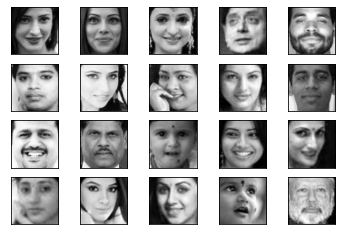

In [5]:
for i in range(20):
  X_img = x_train[i].reshape(128,128)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

print(y_train[0:20])
plt.show()  

x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
np.random.seed(0)
hiddenSize1 = 100

In [7]:
in_size = 16384
in_img = keras.Input(shape=(in_size,))
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) 
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  

autoencoder = keras.Model(in_img, decoded)

encoder = keras.Model(in_img, encoded)

autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
11/11 [==============================] - 4s 127ms/step - loss: 0.0488
Epoch 2/50
11/11 [==============================] - 1s 136ms/step - loss: 0.0447
Epoch 3/50
11/11 [==============================] - 1s 132ms/step - loss: 0.0442
Epoch 4/50
11/11 [==============================] - 1s 125ms/step - loss: 0.0435
Epoch 5/50
11/11 [==============================] - 1s 121ms/step - loss: 0.0428
Epoch 6/50
11/11 [==============================] - 1s 129ms/step - loss: 0.0422
Epoch 7/50
11/11 [==============================] - 1s 124ms/step - loss: 0.0416
Epoch 8/50
11/11 [==============================] - 1s 127ms/step - loss: 0.0410
Epoch 9/50
11/11 [==============================] - 2s 139ms/step - loss: 0.0405
Epoch 10/50
11/11 [==============================] - 1s 137ms/step - loss: 0.0400
Epoch 11/50
11/11 [==============================] - 1s 127ms/step - loss: 0.0396
Epoch 12/50
11/11 [==============================] - 1s 134ms/step - loss: 0.0392
Epoch 13/50
11/11 [======

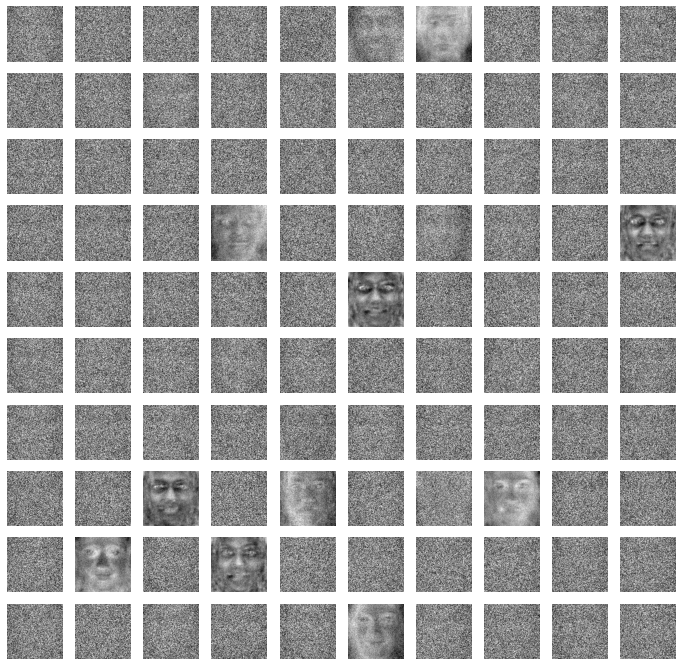

In [9]:
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(128,128)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [10]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 25

87/87 [==============================] - 1s 5ms/step


In [11]:
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
11/11 [==============================] - 2s 8ms/step - loss: 0.2533
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2152
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.1810
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1465
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1140
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0681
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0551
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0406
Epoch 11/50
11/11 [==============================] - 0s 5ms/step - loss: 0.0365
Epoch 12/50
11/11 [==============================] - 0s 6ms/step - loss: 0.0336
Epoch 13/50
11/11 [==============================

In [13]:
feat2 = encoder2.predict(feat1)

87/87 [==============================] - 0s 3ms/step


In [14]:
from tensorflow.keras.utils import to_categorical
soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(2,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
11/11 [==============================] - 1s 5ms/step - loss: 0.3525
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3019
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2640
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2508
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.2507
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2506
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2501
Epoch 8/50
11/11 [==============================] - 0s 8ms/step - loss: 0.2500
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 10/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 11/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 12/50
11/11 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 13/50
11/11 [==============================

In [16]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)
print(y_test)
y_classified

38/38 [==============================] - 0s 3ms/step
[1. 1. 1. ... 0. 0. 1.]


array([0, 1, 0, ..., 0, 0, 0])

In [17]:
stacked_in = keras.Input(shape=(in_size,))
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(2, activation='softmax')(layer2)

stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")

stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

In [19]:
def plot_confusion_matrix(y_classified, y_true):
  c_mat = np.zeros((2,2))
  for i in range(len(y_true)):
    c_mat[y_classified[i], int(y_true[i])] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

38/38 [==============================] - 1s 7ms/step


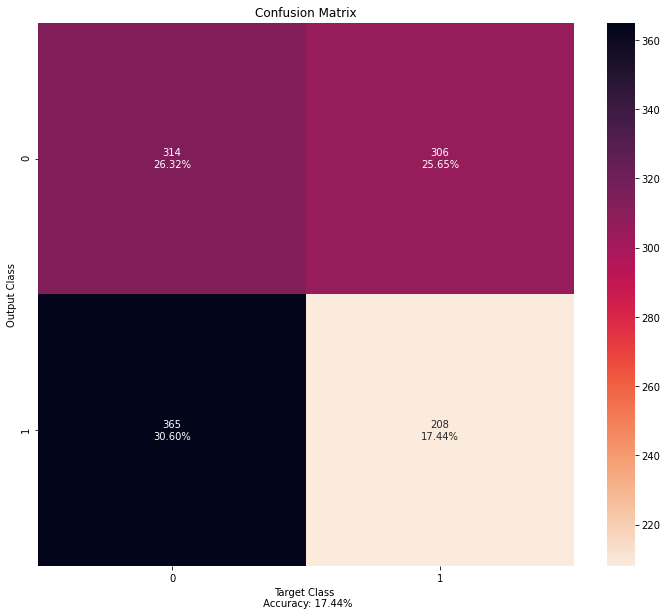

In [20]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

In [21]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

Epoch 1/20
11/11 [==============================] - 2s 38ms/step - loss: 0.2455
Epoch 2/20
11/11 [==============================] - 1s 46ms/step - loss: 0.2447
Epoch 3/20
11/11 [==============================] - 1s 48ms/step - loss: 0.2428
Epoch 4/20
11/11 [==============================] - 1s 47ms/step - loss: 0.2387
Epoch 5/20
11/11 [==============================] - 1s 50ms/step - loss: 0.2309
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 0.2219
Epoch 7/20
11/11 [==============================] - 1s 48ms/step - loss: 0.2104
Epoch 8/20
11/11 [==============================] - 1s 47ms/step - loss: 0.1988
Epoch 9/20
11/11 [==============================] - 0s 44ms/step - loss: 0.1904
Epoch 10/20
11/11 [==============================] - 1s 45ms/step - loss: 0.1785
Epoch 11/20
11/11 [==============================] - 0s 42ms/step - loss: 0.1694
Epoch 12/20
11/11 [==============================] - 0s 43ms/step - loss: 0.1625
Epoch 13/20
11/11 [==================

38/38 [==============================] - 0s 9ms/step


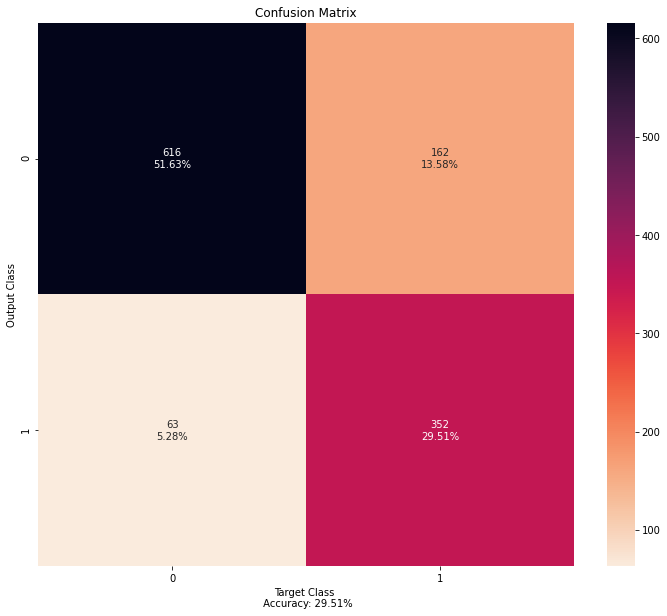

In [22]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
11/11 [==============================] - 1s 54ms/step - loss: 0.1152
Epoch 2/20
11/11 [==============================] - 1s 49ms/step - loss: 0.1068
Epoch 3/20
11/11 [==============================] - 1s 49ms/step - loss: 0.1092
Epoch 4/20
11/11 [==============================] - 0s 44ms/step - loss: 0.1072
Epoch 5/20
11/11 [==============================] - 0s 41ms/step - loss: 0.1032
Epoch 6/20
11/11 [==============================] - 0s 39ms/step - loss: 0.0996
Epoch 7/20
11/11 [==============================] - 0s 40ms/step - loss: 0.0978
Epoch 8/20
11/11 [==============================] - 0s 41ms/step - loss: 0.0987
Epoch 9/20
11/11 [==============================] - 0s 37ms/step - loss: 0.0934
Epoch 10/20
11/11 [==============================] - 0s 36ms/step - loss: 0.0943
Epoch 11/20
11/11 [==============================] - 0s 38ms/step - loss: 0.0965
Epoch 12/20
11/11 [==============================] - 0s 38ms/step - loss: 0.0938
Epoch 13/20
11/11 [==================

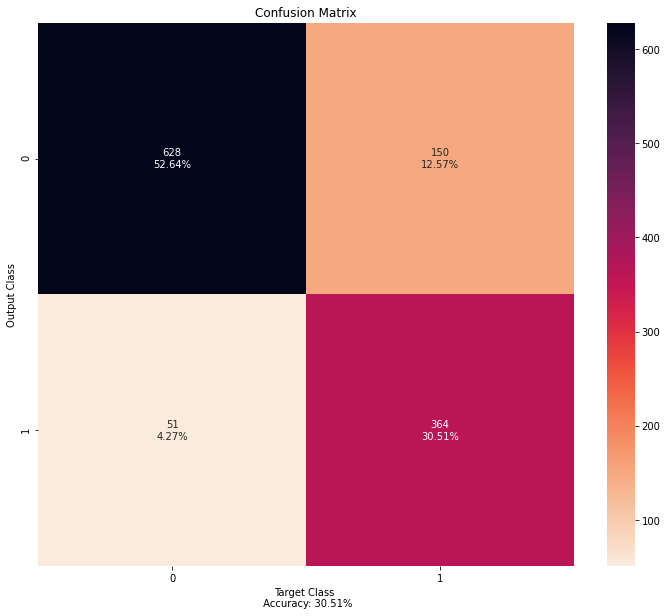

In [23]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
11/11 [==============================] - 0s 22ms/step - loss: 0.1039
Epoch 2/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0868
Epoch 3/20
11/11 [==============================] - 0s 22ms/step - loss: 0.0810
Epoch 4/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0783
Epoch 5/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0815
Epoch 6/20
11/11 [==============================] - 0s 20ms/step - loss: 0.0807
Epoch 7/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0782
Epoch 8/20
11/11 [==============================] - 0s 22ms/step - loss: 0.0772
Epoch 9/20
11/11 [==============================] - 0s 22ms/step - loss: 0.0743
Epoch 10/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0775
Epoch 11/20
11/11 [==============================] - 0s 22ms/step - loss: 0.0798
Epoch 12/20
11/11 [==============================] - 0s 20ms/step - loss: 0.0771
Epoch 13/20
11/11 [==================

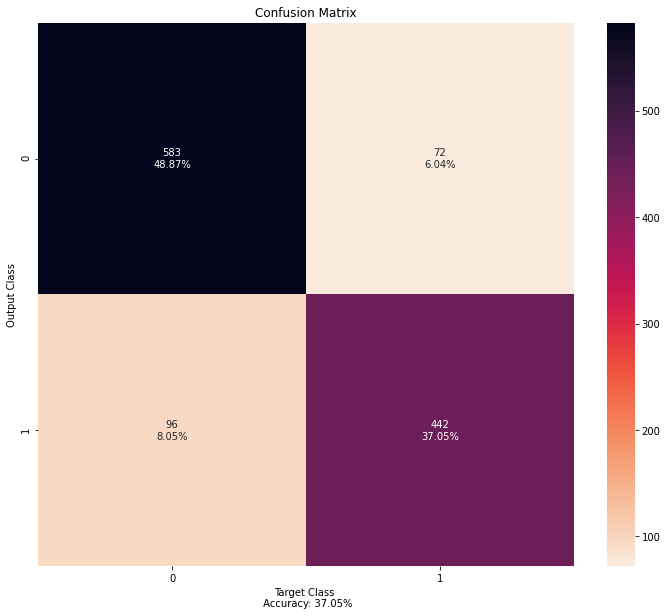

In [24]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)